# Human Development, Gender Equality, and Suicide

Student names: Mitch Boontjes, Lloyd de Rouw, Julian

Team number: J4

In [1]:
# Load image from link
url = 'https://i0.wp.com/epthinktank.eu/wp-content/uploads/2022/06/AdobeStock_456540956.jpeg?fit=4865%2C3000&ssl=1'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "© European Parliamentary Research Service"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

© European Parliamentary Research Service


## Introduction

In this Data Story there will be an investigation on if there is a relationship between the Human Development Index (HDI) and the Gender Sucide ratio. The HDI is an internationally used index to measure the quality of life of a person in a certain country. The quality of life can be described simply as how livable a country is for an average person living in a country. Variables of this index are, among other things, life expectancy, education, healthcare and gross national income per capita. Men commit on average 3,9 times more suicide than women worldwide, but this varies per country. We are specifically interested if a higher HDI leads to a more evenly distributed gender suicide ratio. We will also take a look at the Gender Development Index (GDI). The GDI measures the index of the equality between the HDI for men and women. So if the HDI for men and women is almost equal, then the GDI is close to 1. With this extra variable, we can also look if the GDI has a effect on the gender suicide ratio. 
With this Data Story, we hope to get a better insight in the relation between the development of a country, the development of gender and the suicide ratio.

## Dataset and Preprocessing

Database 1 contains information about suicides in each country, as for men and women for every year between 1987 and 2016.  It would seem logical to filter for the year 2015, since this year is used in the other databases. However, the registered amount of countries for that year is only 62, which is why we have chosen to compare for the year 2013, which has 80 registered countries. The data that we are interested in (suicides/100k civilians) is categorized in a certain age group, year, and country. Male and female suicides are also separated. Based on these qualifications, two separate datasets are constructed, one male, and one female. The mean suicides/100k is then calculated for both datasets, and added as a column. Then, the male and female datasets are merged together into one, also including a male-female suicide ratio (suicides/100k male / suicides/100k female).

Database 2 contains data of 185 countries, revolved around the Human Development Index (HDI)  of each country, measured in 2015 specifically. The HDI is a value between 0 and 1 (low-high) that indicates human development by looking at health, education, and standard of living. The database contains each variable that is considered for the HDI value, but we are only interested in the HDI values themselves. Thus, as for preprocessing, all columns except the country and its HDI value are removed.

Database 3 is in terms of data-context identical to the first one, yet it revolves around the Gender Development Index (GDI), instead of the HDI. The GDI is also a value between 0 and 1 (low-high), that indicates equality in human development specifically between male and female. To clarify, the higher the gender equality, the higher the GDI value will be. Similarly to the preprocessing of database one, will all rows except the country and its GDI value be removed. Finally, dataset 2 and 3 are merged together based on their shared countries. Rows that include one or more ‘empty’ values are removed from the dataset.

Database 4 contains the HDI values for 189 countries for each year from 1990 to 2019. As we are interested specifically in the HDI values for each country from the year 2013 (based on the argumentation above in dataset 1, all other years are filtered out. This database is then merged with database 2 to form a separate dataset. This dataset will be used to prove why the HDI values of 2015 can be compared with the suicide statistics of 2013, as the difference between the HDI values of 2013 and 2015 are insignificant. 

Datasets 1-4 are finally merged into one based on their shared country, which results in a dataset with 70 countries.



# Imports & Installs

In [2]:
# pip install -U numpy
# pip install -U plotly
# pip install -U pandas
# pip install -U matplotlib
# pip install -U seaborn


This data story will explore three different perspectives.

- The first perspective is that the HDI and GDI have iflunece on the average suicides per country
- The second perspective we will look specifically at the suicides per gender
- The third perspective we will look at the geographical distribution of suicide rates based on GDI and HDI levels

## Your First Perspective

The first perspective is that the HDI and GDI have influence on the average suicides per country

### The First Argument of Your First Perspective

Blablabla

In [3]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
from ipywidgets import interact

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/FINAL DATASET.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Remove outliers based on IQR
Q1 = merged_data['Average suicide 2015'].quantile(0.25)
Q3 = merged_data['Average suicide 2015'].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = merged_data[
    (merged_data['Average suicide 2015'] >= lower_bound) &
    (merged_data['Average suicide 2015'] <= upper_bound)
]

# Define the function to update the map based on the selected index
def update_map(index):
    if index == 0:
        column_name = 'HDI 2015'
        title = 'HDI 2015 Worldwide'
    elif index == 1:
        column_name = 'GDI 2015'
        title = 'GDI 2015 Worldwide'
    elif index == 2:
        column_name = 'Average suicide 2015'
        title = 'Average Suicides/100k Worldwide, 2015'
    
    fig = px.choropleth(
        filtered_data,
        geojson=filtered_data.geometry,
        locations=filtered_data.index,
        color=column_name,
        color_continuous_scale='YlOrRd',
        range_color=(filtered_data[column_name].min(), filtered_data[column_name].max()),
        projection="natural earth"
    )
    
    fig.update_layout(
        title=title,
        coloraxis_colorbar=dict(
            title=column_name,
            len=0.8,
            thickness=20,
            ypad=0,
            yanchor="top",
            ticks="outside",
            tickvals=[filtered_data[column_name].min(), filtered_data[column_name].max()],
            ticktext=[str(filtered_data[column_name].min()), str(filtered_data[column_name].max())]
        ),
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type="natural earth"
        )
    )

    fig.show()

# Use the interact function to create the interactive widget
interact(update_map, index=[('HDI', 0), ('GDI', 1), ('Average Suicides/100k', 2)])

ModuleNotFoundError: No module named 'geopandas'

> *Figure 1: This graph shows the HDI, GDI, and number of suicides/100k of each country. The color of the country gets darker when the value gets higher.

In [2]:
import plotly.graph_objects as go
import pandas as pd

# Read the data from table2.csv
df2 = pd.read_csv('table2.csv')

# Initialize a figure
fig2 = go.Figure()

# Create the first line
fig2.add_trace(
    go.Scatter(
        x=df2["Jaartal"], 
        y=df2["Workers involved (x 1,000)"],
        mode='lines+markers',
        line=dict(color='#00a1cd', width=2),
        marker=dict(color='#00a1cd', size=5),
        name="Workers involved",
        hovertemplate='<b>%{x}</b><br>Workers involved: <b>%{y} thousand</b> <extra></extra>'
    )
)

# Create the second line
fig2.add_trace(
    go.Scatter(
        x=df2["Jaartal"], 
        y=df2["Working days lost (x 1,000)"],
        mode='lines+markers',
        line=dict(color='#0058b8', width=2),
        marker=dict(color='#0058b8', size=5),
        name="Working days lost",
        hovertemplate='<b>%{x}</b><br>Working days lost: <b>%{y} thousand</b> <extra></extra>'
    )
)

# Customize the plot layout
fig2.update_layout(
    plot_bgcolor='white',
    xaxis=dict(title='Years'),
    yaxis=dict(title=''),  # Remove y-axis tick labels
    legend=dict(title='', orientation='h', yanchor='bottom', y=-0.3, xanchor='right', x=0.3),  # Update legend settings
    title="Number of workers involved and working<br>days lost during strikes (in thousand)",
    height=500
)

# Add horizontal lines at y = 0, 100, 200, 300, 400, and 500
y_values = [0, 100, 200, 300, 400, 500]
for y in y_values:
    fig2.add_shape(
        type='line',
        x0=min(df2['Jaartal']),
        x1=max(df2['Jaartal']),
        y0=y,
        y1=y,
        line=dict(color='black'),
        line_width=0.5
    )

# Show the plot
fig2.show()

> *Figure 2: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante.

### The Second Argument of Your First Perspective

It va esser tam simplic quam Occidental in fact, it va esser Occidental. A un Angleso it va semblar un simplificat Angles, quam un skeptic Cambridge amico dit me que Occidental es. Li Europan lingues es membres del sam familie. Lor separat existentie es un myth. Por scientie, musica, sport etc, litot Europa usa li sam vocabular. Li lingues differe solmen in li grammatica, li pronunciation e li plu commun vocabules. Omnicos directe al desirabilite de un nov lingua franca: On refusa continuar payar custosi traductores. At solmen va esser necessi far uniform grammatica, pronunciation e plu sommun paroles.

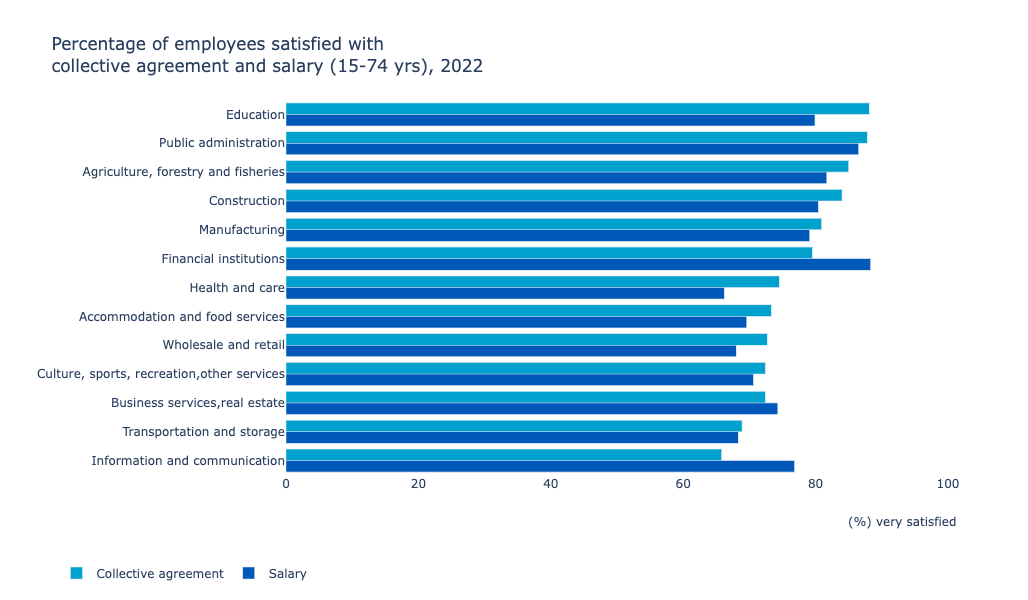

In [4]:
import plotly.graph_objects as go
import pandas as pd

# Read the data from table3.csv
df3 = pd.read_csv('table3.csv')

# Create an empty figure
fig3 = go.Figure()

# Define a list of tuples with the variable names and their respective colors
variables = [("Collective agreement (CAO) (% (very) satisfied)", '#00a1cd'), 
             ("Salary (% (very) satisfied)", '#0058b8')]

# Loop over the variables to add a trace for each one
for var, color in variables:
    name = var.split("(")[0].strip()
    fig3.add_trace(go.Bar(
        y=df3["Bedrijfstak"],
        x=df3[var],
        name=name,
        orientation='h',
        hovertemplate=f'%{{y}}<br>{name}: <b>%{{x}}% (very) satisfied</b><extra></extra>',
        marker_color=color
    ))

# Customize the plot layout
fig3.update_layout(
    plot_bgcolor='white',
    title="Percentage of employees satisfied with<br>collective agreement and salary (15-74 yrs), 2022",
    xaxis=dict(title='', title_standoff=10, automargin=True, range=[0, 100]),  # Hide the original x-axis title
    yaxis=dict(title='', autorange="reversed", automargin=True),  # Remove y-axis title and add more whitespace between items
    legend=dict(title='', orientation='h', yanchor='bottom', y=-0.3, xanchor='right', x=0.04),  # Update legend settings
    barmode='group',  # Stack bars instead of placing them side-by-side
    height=600,
    annotations=[dict(x=1.015, y=-0.15, xref='paper', yref='paper', showarrow=False, text="(%) very satisfied")]  # Add annotation as x-axis title
)

# Show the plot
fig3.show()

> *Figure 3: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

Li Europan lingues es membres del sam familie. Lor separat existentie es un myth. Por scientie, musica, sport etc, litot Europa usa li sam vocabular. Li lingues differe solmen in li grammatica, li pronunciation e li plu commun vocabules. Omnicos directe al desirabilite de un nov lingua franca: On refusa continuar payar custosi traductores.

## Your Second Perspective

Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu.

### The First Argument of Your Second Perspective

Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc.

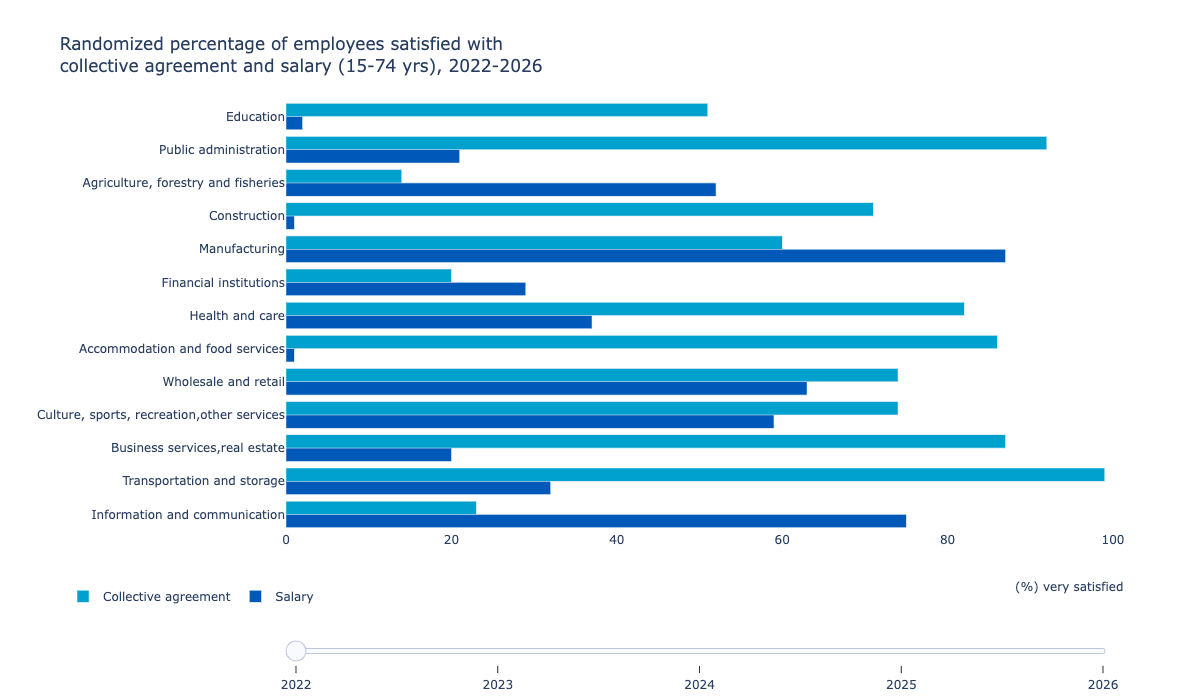

In [5]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Assuming you have df3 as your original DataFrame
# Create a new DataFrame for random data
df4 = df3.copy()
# Set a random seed for reproducibility
np.random.seed(42)

# Add random data for years 2022-2026
for year in range(2022, 2027):
    for var, _ in variables:
        df4[var + " " + str(year)] = np.random.randint(0, 100, df4.shape[0])

# Create an empty figure
fig4 = go.Figure()

# Initialize a list to hold the trace names
trace_names = []

# Loop over the variables to add a trace for each one
for var, color in variables:
    for year in range(2022, 2027):
        name = var.split("(")[0].strip()
        trace_name = f"{name} {year}"
        fig4.add_trace(go.Bar(
            y=df4["Bedrijfstak"],
            x=df4[var + " " + str(year)],
            name=name,
            orientation='h',
            hovertemplate=f'%{{y}}<br>{name}: <b>%{{x}}% (very) satisfied</b><extra></extra>',
            marker_color=color,
            legendgroup=name,  # Add a legend group for each variable
            visible = year == 2022
        ))
        trace_names.append(trace_name)

# Add slider steps
steps = []
for i, year in enumerate(range(2022, 2027)):
    step = dict(
        method="update",
        args=[{"visible": [name.endswith(str(year)) for name in trace_names]},  # Show only the traces ending with the current year
              {"title": f"Randomized percentage of employees satisfied with collective agreement and salary<br>(15-74 yrs), {year}"}],
        label=str(year)
    )
    steps.append(step)

# Customize the plot layout
fig4.update_layout(
    plot_bgcolor='white',
    title="Randomized percentage of employees satisfied with<br>collective agreement and salary (15-74 yrs), 2022-2026",
    xaxis=dict(title='', title_standoff=10, automargin=True, range=[0, 100]),  
    yaxis=dict(title='', autorange="reversed", automargin=True),
    legend=dict(title='', orientation='h', yanchor='bottom', y=-0.185, xanchor='right', x=0.04),
    barmode='group',
    annotations=[dict(x=1.015, y=-0.15, xref='paper', yref='paper', showarrow=False, text="(%) very satisfied")],
    sliders=[dict(
        active=0,
        pad={"t": 110},  # Increase top padding for the slider to move it further down
        len=1,  # Adjust the length of the slider
        steps=steps,
        currentvalue={"visible": False}
    )],
    height=700
)

# Show the plot
fig4.show()

> *Figure 4: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur?

### The Second Argument of Your Second Perspective

Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.

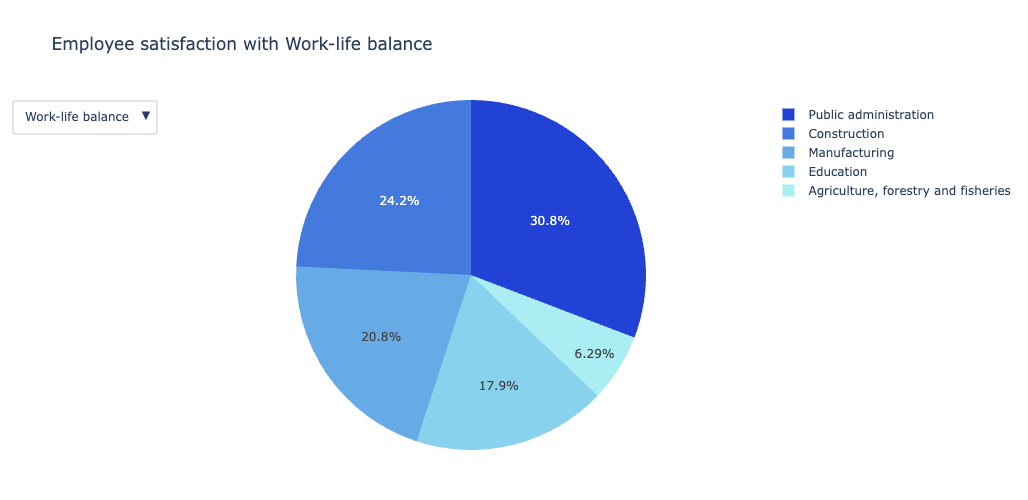

In [6]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.colors as colors

# Set a random seed for reproducibility
np.random.seed(42)

# Create a new DataFrame for random data
df5 = df3[df3['Bedrijfstak'].isin(df3['Bedrijfstak'].unique()[:5])].copy()

# Define new variables and add random data for each one
new_variables = ["Work-life balance", "Job security", "Company culture"]
for var in new_variables:
    df5[var] = np.random.randint(6, 100, df5.shape[0])  # generate random integers from 6 to 100

# Initialize an empty figure
fig5 = go.Figure()

# Add a pie chart for each variable
for var in new_variables:
    fig5.add_trace(go.Pie(
        labels=df5["Bedrijfstak"],
        values=df5[var],
        name=var,
        hovertemplate=f'{var}: <b>%{{value}}% (very) satisfied</b><extra></extra>',
    ))

# Only display the first pie chart initially
for i in range(1, len(fig5.data)):
    fig5.data[i].visible = False

# Create a dropdown menu
dropdown = [{"label": var, "method": "update",
             "args": [{"visible": [j == i for j in range(len(new_variables))]},
                      {"title": f"Employee satisfaction with {var}"}]}
            for i, var in enumerate(new_variables)]


# Define a custom color scale
custom_colorscale = [
    '#2241D5',
    '#447ADE',
    '#66ABE6',
    '#88D2ED',
    '#AAEEF3'
]

# Customize the plot layout
fig5.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            buttons=dropdown,
            direction="down",
            showactive=True
        ),
    ],
    title="Employee satisfaction with Work-life balance",
    title_x=0.05,  # move the title to the left
    colorway=custom_colorscale,  # set the blue color scale
    height=500,  # set the height of the plot
    margin=dict(l=50, r=50, t=100, b=50),  # adjust the margins for proper spacing
    xaxis=dict(domain=[0, 0.45]),  # adjust the x-axis position
    yaxis=dict(domain=[0.2, 1.0])  # adjust the y-axis position
)

# Show the plot
fig5.show()

> *Figure 5: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

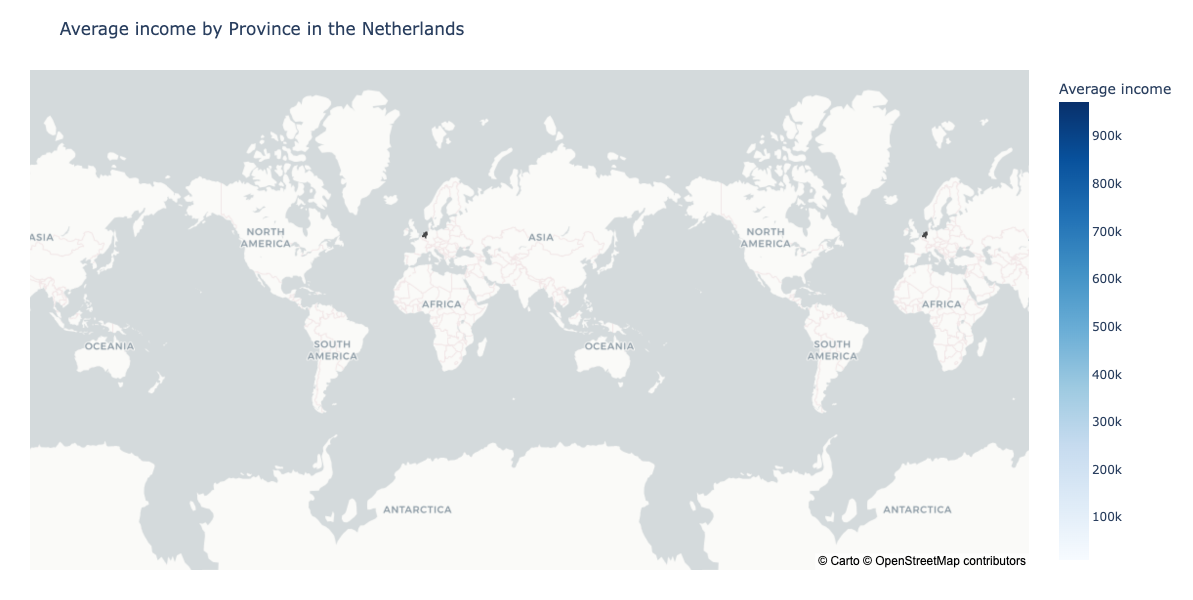

In [7]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import random

# Read the shapefile using geopandas
shapefile_path = 'gadm41_NLD_shp/gadm41_NLD_1.shp'
data = gpd.read_file(shapefile_path)

# Sample data for demonstration
sample_data = {
    'Province': ['Drenthe', 'Flevoland', 'Fryslân', 'Gelderland', 'Groningen', 'Limburg', 'Noord-Brabant', 'Noord-Holland', 'Overijssel', 'Utrecht', 'Zeeland', 'NA'],
    'average_income': [random.randint(0, 1000000) for _ in range(12)]
}

# Merge the sample data with the shapefile data
merged_data = data.merge(pd.DataFrame(sample_data), left_on='NAME_1', right_on='Province')

# Exclude Zeeuwse meren and IJsselmeer regions
merged_data = merged_data[~merged_data['NAME_1'].isin(['Zeeuwse meren', 'IJsselmeer'])]

# Rename Fryslân to Friesland
merged_data.loc[merged_data['NAME_1'] == 'Fryslân', 'NAME_1'] = 'Friesland'

# Rename Noord-Brabant to Brabant
merged_data.loc[merged_data['NAME_1'] == 'Noord-Brabant', 'NAME_1'] = 'Brabant'

# Rename NA to Zuid-Holland
merged_data.loc[merged_data['NAME_1'] == 'NA', 'NAME_1'] = 'Zuid-Holland'

# Create the choropleth map using Plotly Express
fig6 = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry.__geo_interface__,
    color='average_income',
    locations=merged_data.index,
    featureidkey="id",
    center={"lat": 52.1326, "lon": 5.2913},
    mapbox_style="carto-positron",
    zoom=5.5,
    color_continuous_scale='Blues',
    labels={'average_income': 'Average income'},
    opacity=0.75,
    hover_name='NAME_1',  # Update to 'NAME_1' for correct hover labels
    hover_data={'average_income': True, 'NAME_1': False},  # Update to 'NAME_1' for correct hover data
    custom_data=['average_income'],
)

fig6.update_traces(
    hovertemplate='<b>%{hovertext}</b><br>Average income: <b>%{customdata[0]}k</b><extra></extra>',
)

fig6.update_layout(
    title_text='Average income by Province in the Netherlands',
    margin={"r": 30, "t": 70, "l": 30, "b": 30},
    legend=dict(
        traceorder='normal',
        font=dict(size=10),
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='rgba(0, 0, 0, 0.5)',
        borderwidth=0.5
    ),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial',
    ),
    height=600
)

fig6.show()

> *Figure 6: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

## Reflection

On the draft version of the data story, we had received some feedback. 
- At first the code did not run, because we did not import the proper libraries. We quickly solved this by putting the imports and installs at the top of our notebook.
- The first plot was not meaningful; it did not explain anything in the blink of an eye. We decided to remove the plot as a whole, and replaced it with a more meaningful graph.
- The code-inputs were not hidden. The Teaching assistants quickly resolved this when we asked for their help on this problem.
- Our Point of Views were not clear, the plots did not match one certain PoV, and the data story was not a smooth story, but it was rather unmethodically placed parts of information. To resolve this, we took a good look at our perspectives, the graphs that belong to those perspectives, and then we tried to make it flow over well, so that the parts become a story as a whole.

During the peer feedback, we had received tips from the other two groups.
- The graphs were hard to read, and some did not make a lot of sense. They gave examples on what would be a better and clearer understanding graph.
- The combination of using the Gender Development Index (GDI) and the Gender Inequality Index (GII) made the graphs unclear whether it was a good thing that the values in the graphs raised, or a bad thing.
- The data story did not feel like a story, but rather parts put together.

We examined the feedback provided and worked on the points. Some graphs we have excluded and others we adjusted for more clarity. We worked on making the perspectives not be a separate part of the story, but more merged as a whole story.

## Work Distribution

Work Distribution:

For our project, we divided the workload among the three of us to ensure an even distribution of responsibilities. Since we do not have a fourth member in our group, we tried to divide the workload evenly. Each team member contributed to different sections of the project as follows:

- Introduction: Developed by Julian
   - Julian took the responsibility of crafting a comprehensive and engaging introduction section for the project. 
   
- Preprocessing: Managed by Lloyd
   - Lloyd played a key role in preprocessing the project data, cleaning and transforming it to make it suitable for analysis. He implemented data cleaning techniques, handled missing values, and ensured data integrity.

- Perspectives: Divided between Mitch, Julian & Lloyd
    - We decided that each person would be assigned one perspective to work on. This way the work is divided evenly between the three of us.

- Reflection, Work Distribution & Appendix: Handled by Mitch 
    - Mitch took the lead in crafting the reflection section, providing thoughtful insights, and analyzing the outcomes and lessons learned from the project. He also took charge of the work distribution process and the appendix.

By splitting the workload in this manner, we aimed to leverage each team member's strengths and ensure a balanced contribution from everyone involved. This approach allowed us to efficiently complete the project while maintaining consistency and quality across all sections.

## References

- Global Suicide Data.
https://www.kaggle.com/datasets/sathutr/global-suicide-data?select=gender_rates.csv

- Human Development Report 2015.
https://www.kaggle.com/datasets/undp/human-development?select=human_development.csv



## Appendix

Generative AI (ChatGPT with GPT 3.5) is used to facilitate the creation of this document, as shown in the table below.

| Reasons of Usage | In which parts? | Which prompts were used? |
| ------------------------ | --------------------------------- | -------------------------------------------- |
| Brainstorming multiple perspectives | The entire project framing | "Give examples of perspectives about HDI, GDI and suicide rates per country" |
| Improve writing clarity and enhance readability | All sections | "Edit the following text to make it more clear. Do not alter the meaning." |
| Merge perspectives | All sections | "Revise the following text to improve readability and flow of the story." |
| Ensure grammatical accuracy |  All sections | "Correct any grammatical errors in the text." |
| Provide alternative phrasing | Descriptions of the perspectives | "Suggest alternative phrases for better clarity." |
| Graph ideas | Visualizations | "What kind of graphs are useful for the following keywords."|
| Graph generating | Visualizations | "How can i use this graph to give a clear understanding about the following subject." |
| Improving code | Visualizations and Preprocessing | "Make this code more efficient without losing important information." |

> *Table 1: Usage of generative AI to facilitate the creation of this document.*